In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pdb

import session
reload(session)

<module 'session' from 'session.pyc'>

In [10]:
# set the main data directory (this needs to be changed by each user)
maindir = '/Volumes/Richardslab-Share/Colleen/AIBS_pilot_data/'

In [11]:
# get all the sessions to analyze
with open('mouse_df.pkl','r') as f:
    mdf = pickle.load(f)
    
allsessions = [str(sess) for sess in mdf['sessionid']]

In [20]:
# create a dictionary with Session objects prepared for analysis
sdict  = {}
nodata = []
for sess in allsessions:
    try:
        print("\nCreating session {}...".format(sess))
        sdict[sess] = session.Session(maindir,sess)    # creates a session object to work with
        sdict[sess].extract_info(load_run=False)                     # extracts necessary info for analysis
        print("finished session {}.".format(sess))
    except:
        nodata.append(sess)
        print("Could not find data for session {}".format(sess))


Creating session 712483302...
Loading stimulus dictionary...
Loading alignment dataframe...
NOTE: Stimulus alignment pickle already exists in /Volumes/Richardslab-Share/Colleen/AIBS_pilot_data/ophys_session_712483302
Skipping running data...
Loading ROI trace info...


finished session 712483302.

Creating session 712942208...
Loading stimulus dictionary...
Loading alignment dataframe...
NOTE: Stimulus alignment pickle already exists in /Volumes/Richardslab-Share/Colleen/AIBS_pilot_data/ophys_session_712942208
Skipping running data...
Loading ROI trace info...


finished session 712942208.

Creating session 715244457...
Loading stimulus dictionary...
Loading alignment dataframe...
NOTE: Stimulus alignment pickle already exists in /Volumes/Richardslab-Share/Colleen/AIBS_pilot_data/ophys_session_715244457
Skipping running data...
Loading ROI trace info...


finished session 715244457.

Creating session 715576465...
Could not find data for session 715576465

Creating session 716425232...

finished session 722188453.

Creating session 723322122...
Loading stimulus dictionary...
Loading alignment dataframe...
calculating stimulus alignment
Creating the stim_df:
('stimtype:', 'b')
('stimtype:', 'g')
Skipping running data...
Loading ROI trace info...



finished session 723322122.

Creating session 723323411...
Loading stimulus dictionary...
Loading alignment dataframe...
calculating stimulus alignment
Creating the stim_df:
('stimtype:', 'b')
('stimtype:', 'g')
Skipping running data...
Loading ROI trace info...



finished session 723323411.

Creating session 724421207...
Loading stimulus dictionary...
Loading alignment dataframe...
calculating stimulus alignment
Creating the stim_df:
('stimtype:', 'b')
('stimtype:', 'g')
Skipping running data...
Loading ROI trace info...



finished session 724421207.

Creating session 724422062...
Loading stimulus dictionary...
Loading alignment dataframe...
calculating stimulus alignment
Creating the stim_df:
('stimtype:', 'b')
('stimtyp

In [22]:
# save the session dictionary in a pickle file
with open('session_data.pkl','w') as f:
    pickle.dump([maindir, mdf, allsessions, sdict, nodata], f)

In [27]:
# pick some padding
pad = (10,0)

In [38]:
# init traces lists
#traces = [[],[],[],[],[]]

# init dataframe indices lists
#mdfidx = [[],[],[],[],[]]

# error list
errs = []

# load the traces
print("Beginning to load traces...")
for index, row in mdf.iterrows():
    print(" - Loading traces for session {}...".format(row['sessionid']))
    S = allsessions[index]
    if index > 14 and not S in nodata:
        for i in range(5):
            print("     - Loading traces for {} images...".format(i))
            try:
                if i == 4:
                    segs = sdict[S].gabors.get_segs_by_criteria(by='seg', surp=1, gaborframe=3, stimPar2=16)
                else:
                    segs = sdict[S].gabors.get_segs_by_criteria(by='seg', surp=0, gaborframe=i, stimPar2=16)
                frames = sdict[S].gabors.get_2pframes_by_seg(segs)
                traces[i].append(sdict[S].get_roi_segments(frames,padding=pad))
                mdfidx[i].append(index)
            except:
                errs.append('S')
                print('            - Error when loading traces for session {}'.format(S))
                
print("finished.")

Beggining to load traces...
 - Loading traces for session 712483302...
 - Loading traces for session 712942208...
 - Loading traces for session 715244457...
 - Loading traces for session 715576465...
 - Loading traces for session 716425232...
 - Loading traces for session 716711420...
 - Loading traces for session 717030161...
 - Loading traces for session 717071321...
 - Loading traces for session 718138179...
 - Loading traces for session 718579351...
 - Loading traces for session 718742560...
 - Loading traces for session 718921993...
 - Loading traces for session 719034388...
 - Loading traces for session 720115420...
 - Loading traces for session 720247732...
 - Loading traces for session 720519615...
     - Loading traces for 0 images...
            - Error when loading traces for session 720519615
     - Loading traces for 1 images...
            - Error when loading traces for session 720519615
     - Loading traces for 2 images...
            - Error when loading traces for se

In [39]:
# save the traces in a pickle file
with open('trace_data_2.pkl','w') as f:
    pickle.dump([mdfidx,traces], f)


In [55]:
# get dF over F
dftraces = [[],[],[],[],[]]
for i in range(5):
    for j, trace in enumerate(traces[i]):
        df0 = np.tile(np.nanmean(trace[:,:pad[0],:],axis=1,keepdims=True),(1,trace.shape[1],1))
        dftraces[i].append((trace - df0)/df0)
#plt.plot(np.nanmean(dftrace,axis=0))
#plt.show()

In [91]:
mdfidx[0]

[0, 1, 2, 4, 5, 6, 9, 10, 12, 21, 24, 25, 26, 27, 28, 29, 30, 31]

In [92]:
mdf

,sessionid,mouseid,depth,sess_n,within_sess_n,overall_sess_n,pass_fail,all_files,any_files
0,712483302,2,20,3,1,3,F,1,1
1,712942208,2,375,4,1,6,F,1,1
2,715244457,2,20,3,3,5,P,1,1
3,715576465,4,20,2,1,2,F,0,1
4,716425232,2,375,4,2,7,P,1,1
5,716711420,2,20,1,1,1,P,1,1
6,717030161,2,375,2,1,2,P,1,1
7,717071321,4,375,3,1,5,F,0,1
8,718138179,4,20,2,2,3,F,0,1
9,718579351,4,375,3,2,6,P,1,1


In [90]:
# initialize some arrays
resp = [np.zeros((22,4,8,4))+np.nan,
        np.zeros((22,4,8,4))+np.nan,
        np.zeros((22,4,8,4))+np.nan,
        np.zeros((22,4,8,4))+np.nan,
        np.zeros((22,4,8,4))+np.nan] # list over images (A-E), then time, quarter, session, mouse


# calculate the mean first, second, third and quarter response for each mouse/session
for i in range(5):
    for j, trace in enumerate(dftraces[i]):
        
        # determine the mouse and session number
        m = mdf.iloc[mdfidx[i][j]]['mouseid']-1
        s = mdf.iloc[mdfidx[i][j]]['sess_n']-1
    
        # determine whether the session passed
        if mdf.iloc[mdfidx[i][j]]['pass_fail'] == 'F':
            print("No usable data for image {}, index {}, mouse {} session {}".format(i+1,mdfidx[i][j],m+1,s+1))
            continue
    
        # determine the number of segments in each bin
        nsegs = trace.shape[2]
        ndiv  = int(np.floor(nsegs/4))
    
        # store each segment
        resp[i][:trace.shape[1],0,s,m] = np.nanmean(np.nanmean(trace[:,:,:ndiv],axis=2),axis=0)
        resp[i][:trace.shape[1],1,s,m] = np.nanmean(np.nanmean(trace[:,:,ndiv+1:ndiv*2],axis=2),axis=0)
        resp[i][:trace.shape[1],2,s,m] = np.nanmean(np.nanmean(trace[:,:,ndiv*2+1:ndiv*3],axis=2),axis=0)
        resp[i][:trace.shape[1],3,s,m] = np.nanmean(np.nanmean(trace[:,:,ndiv*3+1:],axis=2),axis=0)

No usable data for image 1, index 0, mouse 2 session 3
No usable data for image 1, index 1, mouse 2 session 4
No usable data for image 1, index 10, mouse 4 session 2
No usable data for image 2, index 0, mouse 2 session 3
No usable data for image 2, index 1, mouse 2 session 4
No usable data for image 2, index 10, mouse 4 session 2
No usable data for image 3, index 0, mouse 2 session 3
No usable data for image 3, index 1, mouse 2 session 4
No usable data for image 3, index 10, mouse 4 session 2
No usable data for image 4, index 0, mouse 2 session 3
No usable data for image 4, index 1, mouse 2 session 4
No usable data for image 4, index 10, mouse 4 session 2
No usable data for image 5, index 0, mouse 2 session 3
No usable data for image 5, index 1, mouse 2 session 4
No usable data for image 5, index 10, mouse 4 session 2


In [99]:
# create a time variable for plotting
fps = 30.0
spf = 1.0/fps
t   = np.arange(-pad[0]*spf,9*spf,spf)
nt  = t.shape[0]

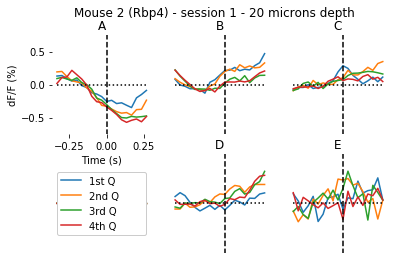

In [190]:
# plot the responses for animal 2, session 1 (layer 1)
images = ['A','B','C','D','E']
m = 1
ylims = [-0.75,0.75]
fig, axes = plt.subplots(2,3,sharey=False)
for s in range(2):
    for i in range(5):
        if s < 1 and i < 3:
            axes[s,i].plot(t,resp[i][:nt,:,s,m]*100)
            axes[s,i].plot(t,np.zeros((nt,)),'k:')
            axes[s,i].plot([0,0],[-5,5],'k--')
            axes[s,i].set_title(images[i])
            axes[s,i].set_ylim([ylims[0],ylims[1]])
            if i > 0:
                axes[s,i].axis('off')
            else:
                axes[s,i].set_ylabel('dF/F (%)')
                axes[s,i].set_xlabel('Time (s)')
                axes[s,i].spines["top"].set_visible(False)
                axes[s,i].spines["bottom"].set_visible(False)
                axes[s,i].spines["right"].set_visible(False)
                axes[s,i].spines["left"].set_visible(False)
        if s == 1 and i == 0:
            axes[s,i].plot(t,resp[0][:nt,:,0,m])
            axes[s,i].legend(['1st Q','2nd Q','3rd Q','4th Q'],loc='center',mode='expand',framealpha=1.0)
            axes[s,i].set_ylim([-1,1])
            axes[s,i].axis('off')
        elif s == 1 and i > 2:
            axes[s,i-2].plot(t,resp[i][:nt,:,s-1,m]*100)
            axes[s,i-2].plot(t,np.zeros((nt,)),'k:')
            axes[s,i-2].plot([0,0],[-5,5],'k--')
            axes[s,i-2].set_ylim([ylims[0],ylims[1]])
            axes[s,i-2].set_title(images[i])
            axes[s,i-2].axis('off')
plt.suptitle("Mouse 2 (Rbp4) - session 1 - 20 microns depth")
plt.show()


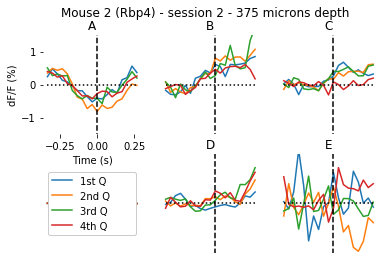

In [191]:
# plot the responses for animal 2, session 2 (layer 5)
images = ['A','B','C','D','E']
m = 1
ylims = [-1.5,1.5]
fig, axes = plt.subplots(2,3,sharey=False)
for s in range(2):
    for i in range(5):
        if s < 1 and i < 3:
            axes[s,i].plot(t,resp[i][:nt,:,s+1,m]*100)
            axes[s,i].plot(t,np.zeros((nt,)),'k:')
            axes[s,i].plot([0,0],[-5,5],'k--')
            axes[s,i].set_title(images[i])
            axes[s,i].set_ylim([ylims[0],ylims[1]])
            if i > 0:
                axes[s,i].axis('off')
            else:
                axes[s,i].set_ylabel('dF/F (%)')
                axes[s,i].set_xlabel('Time (s)')
                axes[s,i].spines["top"].set_visible(False)
                axes[s,i].spines["bottom"].set_visible(False)
                axes[s,i].spines["right"].set_visible(False)
                axes[s,i].spines["left"].set_visible(False)
        if s == 1 and i == 0:
            axes[s,i].plot(t,resp[0][:nt,:,0,m])
            axes[s,i].legend(['1st Q','2nd Q','3rd Q','4th Q'],loc='center',mode='expand',framealpha=1.0)
            axes[s,i].set_ylim([-1,1])
            axes[s,i].axis('off')
        elif s == 1 and i > 2:
            axes[s,i-2].plot(t,resp[i][:nt,:,s,m]*100)
            axes[s,i-2].plot(t,np.zeros((nt,)),'k:')
            axes[s,i-2].plot([0,0],[-5,5],'k--')
            axes[s,i-2].set_ylim([ylims[0],ylims[1]])
            axes[s,i-2].set_title(images[i])
            axes[s,i-2].axis('off')
plt.suptitle("Mouse 2 (Rbp4) - session 2 - 375 microns depth")
plt.show()


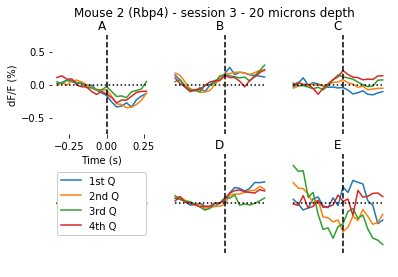

In [192]:
# plot the responses for animal 2, session 3 (layer 1)
images = ['A','B','C','D','E']
m = 1
ylims = [-0.75,0.75]
fig, axes = plt.subplots(2,3,sharey=False)
for s in range(2):
    for i in range(5):
        if s < 1 and i < 3:
            axes[s,i].plot(t,resp[i][:nt,:,s+2,m]*100)
            axes[s,i].plot(t,np.zeros((nt,)),'k:')
            axes[s,i].plot([0,0],[-5,5],'k--')
            axes[s,i].set_title(images[i])
            axes[s,i].set_ylim([ylims[0],ylims[1]])
            if i > 0:
                axes[s,i].axis('off')
            else:
                axes[s,i].set_ylabel('dF/F (%)')
                axes[s,i].set_xlabel('Time (s)')
                axes[s,i].spines["top"].set_visible(False)
                axes[s,i].spines["bottom"].set_visible(False)
                axes[s,i].spines["right"].set_visible(False)
                axes[s,i].spines["left"].set_visible(False)
        if s == 1 and i == 0:
            axes[s,i].plot(t,resp[0][:nt,:,0,m])
            axes[s,i].legend(['1st Q','2nd Q','3rd Q','4th Q'],loc='center',mode='expand',framealpha=1.0)
            axes[s,i].set_ylim([-1,1])
            axes[s,i].axis('off')
        elif s == 1 and i > 2:
            axes[s,i-2].plot(t,resp[i][:nt,:,s+1,m]*100)
            axes[s,i-2].plot(t,np.zeros((nt,)),'k:')
            axes[s,i-2].plot([0,0],[-5,5],'k--')
            axes[s,i-2].set_ylim([ylims[0],ylims[1]])
            axes[s,i-2].set_title(images[i])
            axes[s,i-2].axis('off')
plt.suptitle("Mouse 2 (Rbp4) - session 3 - 20 microns depth")
plt.show()


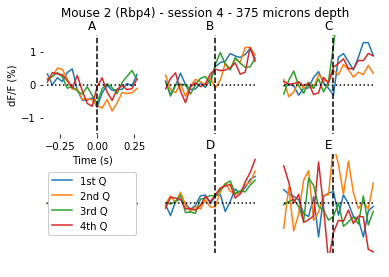

In [193]:
# plot the responses for animal 2, session 4 (layer 5)
images = ['A','B','C','D','E']
m = 1
ylims = [-1.5,1.5]
fig, axes = plt.subplots(2,3,sharey=False)
for s in range(2):
    for i in range(5):
        if s < 1 and i < 3:
            axes[s,i].plot(t,resp[i][:nt,:,s+3,m]*100)
            axes[s,i].plot(t,np.zeros((nt,)),'k:')
            axes[s,i].plot([0,0],[-5,5],'k--')
            axes[s,i].set_title(images[i])
            axes[s,i].set_ylim([ylims[0],ylims[1]])
            if i > 0:
                axes[s,i].axis('off')
            else:
                axes[s,i].set_ylabel('dF/F (%)')
                axes[s,i].set_xlabel('Time (s)')
                axes[s,i].spines["top"].set_visible(False)
                axes[s,i].spines["bottom"].set_visible(False)
                axes[s,i].spines["right"].set_visible(False)
                axes[s,i].spines["left"].set_visible(False)
        if s == 1 and i == 0:
            axes[s,i].plot(t,resp[0][:nt,:,0,m])
            axes[s,i].legend(['1st Q','2nd Q','3rd Q','4th Q'],loc='center',mode='expand',framealpha=1.0)
            axes[s,i].set_ylim([-1,1])
            axes[s,i].axis('off')
        elif s == 1 and i > 2:
            axes[s,i-2].plot(t,resp[i][:nt,:,s+2,m]*100)
            axes[s,i-2].plot(t,np.zeros((nt,)),'k:')
            axes[s,i-2].plot([0,0],[-5,5],'k--')
            axes[s,i-2].set_ylim([ylims[0],ylims[1]])
            axes[s,i-2].set_title(images[i])
            axes[s,i-2].axis('off')
plt.suptitle("Mouse 2 (Rbp4) - session 4 - 375 microns depth")
plt.show()


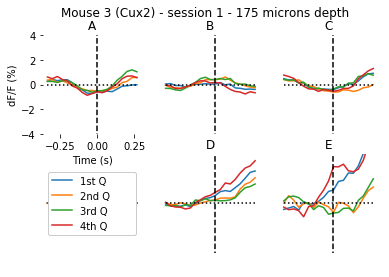

In [194]:
# plot the responses for animal 3, session 1 (layer 2/3)
images = ['A','B','C','D','E']
m = 2
ylims = [-4,4]
fig, axes = plt.subplots(2,3,sharey=False)
for s in range(2):
    for i in range(5):
        if s < 1 and i < 3:
            axes[s,i].plot(t,resp[i][:nt,:,s,m]*100)
            axes[s,i].plot(t,np.zeros((nt,)),'k:')
            axes[s,i].plot([0,0],[-5,5],'k--')
            axes[s,i].set_title(images[i])
            axes[s,i].set_ylim([ylims[0],ylims[1]])
            if i > 0:
                axes[s,i].axis('off')
            else:
                axes[s,i].set_ylabel('dF/F (%)')
                axes[s,i].set_xlabel('Time (s)')
                axes[s,i].spines["top"].set_visible(False)
                axes[s,i].spines["bottom"].set_visible(False)
                axes[s,i].spines["right"].set_visible(False)
                axes[s,i].spines["left"].set_visible(False)
        if s == 1 and i == 0:
            axes[s,i].plot(t,resp[0][:nt,:,0,m])
            axes[s,i].legend(['1st Q','2nd Q','3rd Q','4th Q'],loc='center',mode='expand',framealpha=1.0)
            axes[s,i].set_ylim([-1,1])
            axes[s,i].axis('off')
        elif s == 1 and i > 2:
            axes[s,i-2].plot(t,resp[i][:nt,:,s-1,m]*100)
            axes[s,i-2].plot(t,np.zeros((nt,)),'k:')
            axes[s,i-2].plot([0,0],[-5,5],'k--')
            axes[s,i-2].set_ylim([ylims[0],ylims[1]])
            axes[s,i-2].set_title(images[i])
            axes[s,i-2].axis('off')
plt.suptitle("Mouse 3 (Cux2) - session 1 - 175 microns depth")
plt.show()


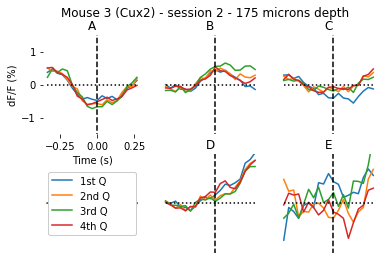

In [195]:
# plot the responses for animal 3, session 2 (layer 2/3)
images = ['A','B','C','D','E']
m = 2
ylims = [-1.5,1.5]
fig, axes = plt.subplots(2,3,sharey=False)
for s in range(2):
    for i in range(5):
        if s < 1 and i < 3:
            axes[s,i].plot(t,resp[i][:nt,:,s+1,m]*100)
            axes[s,i].plot(t,np.zeros((nt,)),'k:')
            axes[s,i].plot([0,0],[-5,5],'k--')
            axes[s,i].set_title(images[i])
            axes[s,i].set_ylim([ylims[0],ylims[1]])
            if i > 0:
                axes[s,i].axis('off')
            else:
                axes[s,i].set_ylabel('dF/F (%)')
                axes[s,i].set_xlabel('Time (s)')
                axes[s,i].spines["top"].set_visible(False)
                axes[s,i].spines["bottom"].set_visible(False)
                axes[s,i].spines["right"].set_visible(False)
                axes[s,i].spines["left"].set_visible(False)
        if s == 1 and i == 0:
            axes[s,i].plot(t,resp[0][:nt,:,0,m])
            axes[s,i].legend(['1st Q','2nd Q','3rd Q','4th Q'],loc='center',mode='expand',framealpha=1.0)
            axes[s,i].set_ylim([-1,1])
            axes[s,i].axis('off')
        elif s == 1 and i > 2:
            axes[s,i-2].plot(t,resp[i][:nt,:,s,m]*100)
            axes[s,i-2].plot(t,np.zeros((nt,)),'k:')
            axes[s,i-2].plot([0,0],[-5,5],'k--')
            axes[s,i-2].set_ylim([ylims[0],ylims[1]])
            axes[s,i-2].set_title(images[i])
            axes[s,i-2].axis('off')
plt.suptitle("Mouse 3 (Cux2) - session 2 - 175 microns depth")
plt.show()


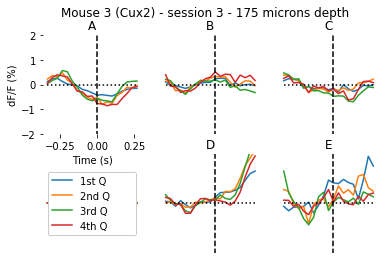

In [196]:
# plot the responses for animal 3, session 3 (layer 2/3)
images = ['A','B','C','D','E']
m = 2
ylims = [-2,2]
fig, axes = plt.subplots(2,3,sharey=False)
for s in range(2):
    for i in range(5):
        if s < 1 and i < 3:
            axes[s,i].plot(t,resp[i][:nt,:,s+2,m]*100)
            axes[s,i].plot(t,np.zeros((nt,)),'k:')
            axes[s,i].plot([0,0],[-5,5],'k--')
            axes[s,i].set_title(images[i])
            axes[s,i].set_ylim([ylims[0],ylims[1]])
            if i > 0:
                axes[s,i].axis('off')
            else:
                axes[s,i].set_ylabel('dF/F (%)')
                axes[s,i].set_xlabel('Time (s)')
                axes[s,i].spines["top"].set_visible(False)
                axes[s,i].spines["bottom"].set_visible(False)
                axes[s,i].spines["right"].set_visible(False)
                axes[s,i].spines["left"].set_visible(False)
        if s == 1 and i == 0:
            axes[s,i].plot(t,resp[0][:nt,:,0,m])
            axes[s,i].legend(['1st Q','2nd Q','3rd Q','4th Q'],loc='center',mode='expand',framealpha=1.0)
            axes[s,i].set_ylim([-1,1])
            axes[s,i].axis('off')
        elif s == 1 and i > 2:
            axes[s,i-2].plot(t,resp[i][:nt,:,s+1,m]*100)
            axes[s,i-2].plot(t,np.zeros((nt,)),'k:')
            axes[s,i-2].plot([0,0],[-5,5],'k--')
            axes[s,i-2].set_ylim([ylims[0],ylims[1]])
            axes[s,i-2].set_title(images[i])
            axes[s,i-2].axis('off')
plt.suptitle("Mouse 3 (Cux2) - session 3 - 175 microns depth")
plt.show()


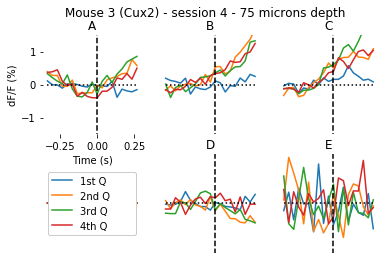

In [197]:
# plot the responses for animal 3, session 4 (layer 1)
images = ['A','B','C','D','E']
m = 2
ylims = [-1.5,1.5]
fig, axes = plt.subplots(2,3,sharey=False)
for s in range(2):
    for i in range(5):
        if s < 1 and i < 3:
            axes[s,i].plot(t,resp[i][:nt,:,s+3,m]*100)
            axes[s,i].plot(t,np.zeros((nt,)),'k:')
            axes[s,i].plot([0,0],[-5,5],'k--')
            axes[s,i].set_title(images[i])
            axes[s,i].set_ylim([ylims[0],ylims[1]])
            if i > 0:
                axes[s,i].axis('off')
            else:
                axes[s,i].set_ylabel('dF/F (%)')
                axes[s,i].set_xlabel('Time (s)')
                axes[s,i].spines["top"].set_visible(False)
                axes[s,i].spines["bottom"].set_visible(False)
                axes[s,i].spines["right"].set_visible(False)
                axes[s,i].spines["left"].set_visible(False)
        if s == 1 and i == 0:
            axes[s,i].plot(t,resp[0][:nt,:,0,m])
            axes[s,i].legend(['1st Q','2nd Q','3rd Q','4th Q'],loc='center',mode='expand',framealpha=1.0)
            axes[s,i].set_ylim([-1,1])
            axes[s,i].axis('off')
        elif s == 1 and i > 2:
            axes[s,i-2].plot(t,resp[i][:nt,:,s+2,m]*100)
            axes[s,i-2].plot(t,np.zeros((nt,)),'k:')
            axes[s,i-2].plot([0,0],[-5,5],'k--')
            axes[s,i-2].set_ylim([ylims[0],ylims[1]])
            axes[s,i-2].set_title(images[i])
            axes[s,i-2].axis('off')
plt.suptitle("Mouse 3 (Cux2) - session 4 - 75 microns depth")
plt.show()


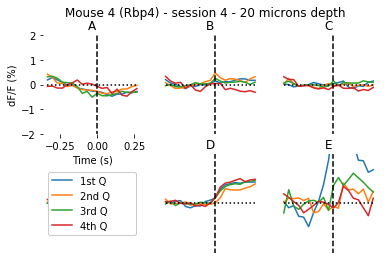

In [198]:
# plot the responses for animal 4, session 4 (layer 1)
images = ['A','B','C','D','E']
m = 3
ylims = [-2,2]
fig, axes = plt.subplots(2,3,sharey=False)
for s in range(2):
    for i in range(5):
        if s < 1 and i < 3:
            axes[s,i].plot(t,resp[i][:nt,:,s+3,m]*100)
            axes[s,i].plot(t,np.zeros((nt,)),'k:')
            axes[s,i].plot([0,0],[-5,5],'k--')
            axes[s,i].set_title(images[i])
            axes[s,i].set_ylim([ylims[0],ylims[1]])
            if i > 0:
                axes[s,i].axis('off')
            else:
                axes[s,i].set_ylabel('dF/F (%)')
                axes[s,i].set_xlabel('Time (s)')
                axes[s,i].spines["top"].set_visible(False)
                axes[s,i].spines["bottom"].set_visible(False)
                axes[s,i].spines["right"].set_visible(False)
                axes[s,i].spines["left"].set_visible(False)
        if s == 1 and i == 0:
            axes[s,i].plot(t,resp[0][:nt,:,0,m])
            axes[s,i].legend(['1st Q','2nd Q','3rd Q','4th Q'],loc='center',mode='expand',framealpha=1.0)
            axes[s,i].set_ylim([-1,1])
            axes[s,i].axis('off')
        elif s == 1 and i > 2:
            axes[s,i-2].plot(t,resp[i][:nt,:,s+2,m]*100)
            axes[s,i-2].plot(t,np.zeros((nt,)),'k:')
            axes[s,i-2].plot([0,0],[-5,5],'k--')
            axes[s,i-2].set_ylim([ylims[0],ylims[1]])
            axes[s,i-2].set_title(images[i])
            axes[s,i-2].axis('off')
plt.suptitle("Mouse 4 (Rbp4) - session 4 - 20 microns depth")
plt.show()
